## Imports

We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix 
import pylab as pl
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [2]:
# Training data
app_train_domain = pd.read_csv('../input/app_train_domain.csv')
print('Training data shape: ', app_train_domain.shape)
app_train_domain.head()

Training data shape:  (307511, 245)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

In [3]:
# Testing data features
app_test_domain = pd.read_csv('../input/app_test_domain.csv')
print('Testing data shape: ', app_test_domain.shape)
app_test_domain.head()

Testing data shape:  (48744, 244)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,1,0,1,0,False,4.213333,0.152300,0.036147,0.121044
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,False,2.250182,0.175455,0.077973,0.247398
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,False,3.275378,0.344578,0.105202,0.222477
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,1,0,0,1,0,False,5.000000,0.155614,0.031123,0.133515
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,False,3.475000,0.178150,0.051266,0.168021


The test set is considerably smaller and lacks a `TARGET` column. 

In [4]:
from sklearn.preprocessing import MinMaxScaler
# imputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Extract ids
#loan_ids = app_train_domain['SK_ID_CURR']
#app_train_domain = app_train_domain.drop(columns='SK_ID_CURR')


# Feature names
features = list(app_train_domain.columns)

# Median imputation of missing values
#imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
#scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
#imputer.fit(app_train_domain)

# Transform training data
#train = imputer.transform(app_train_domain)


# Repeat with the scaler
#scaler.fit(train)
#train = scaler.transform(train)



#Split the train data in train and test set
X_train, X_test= train_test_split(app_train_domain,test_size=0.2,random_state=1)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = features
X_test.columns = features


print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (246008, 245)
Testing data shape:  (61503, 245)


In [5]:
def own_eval_metric(y_true, y_pred):
    TN_cost = 1
    TP_cost = 0
    FP_cost = 0
    FN_cost = -10
    treshold = [0.04,0.06,0.08]
    score = []
   
    nb_positif = sum(y_true)
    nb_negatif = len(y_true) - nb_positif
   
    best_cost = nb_negatif*TN_cost + nb_positif*TP_cost #The best possible score. No classification error
    worst_cost= nb_positif*FN_cost + nb_negatif*FP_cost # The worst possible score. All credits are wrongly classified
    base_cost = nb_negatif*TN_cost + nb_positif*FN_cost #The base score if all credits are classified as being repaid
 
    
    for t in range(0,len(treshold)) :
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        y_pred_cm = []
        for i in range(0,len(y_true)):
            if y_pred[i]<=treshold[t]:
                y_pred_cm.append(0)
            else:
                y_pred_cm.append(1)
        
    
        cm = confusion_matrix(y_true, y_pred_cm)
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TP = cm[1][1]
      
        cost= TP*TP_cost+ TN*TN_cost + FP*FP_cost + FN*FN_cost
        score_l = (cost - base_cost)/(best_cost - base_cost)
      
        score.append(score_l)
    
    max_score = max(score)
    max_score_index =  score.index(max_score)
    print("max :",max_score)
    print("treshold ",treshold[max_score_index])
    return ('own_eval_metric',max_score, True)

# Just for Fun: Light Gradient Boosting Machine

Now (if you want, this part is entirely optional) we can step off the deep end and use a real machine learning model: the [gradient boosting machine](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) using the [LightGBM library](http://lightgbm.readthedocs.io/en/latest/Quick-Start.html)! The Gradient Boosting Machine is currently the leading model for learning on structured datasets (especially on Kaggle) and we will probably need some form of this model to do well in the competition. Don't worry, even if this code looks intimidating, it's just a series of small steps that build up to a complete model. I added this code just to show what may be in store for this project, and because it gets us a slightly better score on the leaderboard. In future notebooks we will see how to work with more advanced models (which mostly means adapting existing code to make it work better), feature engineering, and feature selection. See you in the next notebook!  

In [6]:

def model(features, test_features, n_folds = 3):
    
    """Train and test a light gradient boosting model 
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
    
        
    Return
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
            test_prediction: 
            dataframe with test_predictions results.
        
    """
    # Divide in training/validation and test data
    train_df = features[features['TARGET'].notnull()]
    test_df = test_features[test_features['TARGET'].notnull()]
    print(test_df.shape)
    # LightGBMError: Do not support special JSON characters
    import re
    train_df = train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    # Extract the labels for training
    #labels = features['TARGET']
    #test_labels = test_features['TARGET']
    
    # Remove the ids and target
    #features = features.drop(columns = ['TARGET'])
    #test_features = test_features.drop(columns = ['TARGET'])
    
  
    print('Training Data Shape: ', train_df.shape)
    print('Testing Data Shape: ', test_df.shape)
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR',
                                                      'SK_ID_BUREAU','SK_ID_PREV','index']]
    
    # Extract feature names
    feature_names = feats#list(train_df.columns)
    

    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_df.shape[0])    
    print(test_predictions.shape)
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
        # Create the model
    #model = lgb.LGBMClassifier(n_estimators=200, objective = 'binary', scale_pos_weight=5,metric='custom', first_metric_only = True,
                                 #   learning_rate = 0.05, 
                                  # reg_alpha = 0.1, reg_lambda = 0.1, 
                                  # subsample = 0.8, n_jobs = -1, random_state = 50)
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train_df.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
  
    
    model = lgb.LGBMClassifier(
            boosting_type='goss',
            n_estimators=6000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            #scale_pos_weight=11,
            metric='custom', first_metric_only = True,
            silent=-1,
            verbose=-1 )  
     

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(train_df[feats],train_df['TARGET']):
    
        # Training data for the fold
        train_features, train_labels =  train_df[feats].iloc[train_indices], train_df['TARGET'].iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train_df[feats].iloc[valid_indices], train_df['TARGET'].iloc[valid_indices]
        
      
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = own_eval_metric,
                  eval_set = [(train_features, train_labels),(valid_features, valid_labels)],
                  eval_names = ['train', 'valid'], #categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 10)
             
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
       # Make predictions
        test_predictions += model.predict_proba(test_df[feats], num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['own_eval_metric']
        train_score = model.best_score_['train']['own_eval_metric']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        # Clean up memory
        gc.enable()
        del train_features, train_labels, valid_features, valid_labels
        gc.collect()
 
     
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
  
    print(test_predictions)
    return  feature_importances, test_predictions

In [7]:
fi, prediction = model(X_train, X_test)
print('Baseline metrics')
print(prediction)

(61503, 245)
Training Data Shape:  (246008, 245)
Testing Data Shape:  (61503, 245)
(61503,)
max : 0.09273139403097846
treshold  0.08
max : 0.09389728096676737
treshold  0.08
Training until validation scores don't improve for 100 rounds
max : 0.24374008311295806
treshold  0.08
max : 0.23882175226586103
treshold  0.08
max : 0.2748167737060824
treshold  0.08
max : 0.2692296072507553
treshold  0.08
max : 0.2751870041556479
treshold  0.08
max : 0.27503021148036255
treshold  0.08
max : 0.2866565923687193
treshold  0.08
max : 0.2867522658610272
treshold  0.08
max : 0.29164336985266337
treshold  0.08
max : 0.28953172205438066
treshold  0.08
max : 0.2928296184359652
treshold  0.08
max : 0.28740181268882176
treshold  0.08
max : 0.29205893464299204
treshold  0.08
max : 0.2873716012084592
treshold  0.08
max : 0.29213449187759727
treshold  0.08
max : 0.2904984894259819
treshold  0.08
max : 0.2927465054778995
treshold  0.08
max : 0.2944410876132931
treshold  0.08
[10]	train's own_eval_metric: 0.2927

max : 0.33887419720438233
treshold  0.08
max : 0.32706948640483385
treshold  0.08
max : 0.33919909331318476
treshold  0.08
max : 0.32652567975830815
treshold  0.08
max : 0.339289761994711
treshold  0.08
max : 0.32726586102719035
treshold  0.08
max : 0.3394106535700793
treshold  0.08
max : 0.32682779456193356
treshold  0.08
max : 0.33977332829618434
treshold  0.08
max : 0.32682779456193356
treshold  0.08
max : 0.34058179070646016
treshold  0.08
max : 0.32682779456193356
treshold  0.08
max : 0.34083868530411787
treshold  0.08
max : 0.32643504531722056
treshold  0.08
max : 0.34090668681526254
treshold  0.08
max : 0.32700906344410874
treshold  0.08
[100]	train's own_eval_metric: 0.340907	valid's own_eval_metric: 0.327009
max : 0.34074046089913107
treshold  0.08
max : 0.3272507552870091
treshold  0.08
max : 0.3419040423120514
treshold  0.08
max : 0.3277190332326284
treshold  0.08
max : 0.34224404986777485
treshold  0.08
max : 0.32758308157099697
treshold  0.08
max : 0.34318851530034
treshol

max : 0.3456948640483384
treshold  0.08
max : 0.3683566301473366
treshold  0.08
max : 0.3453021148036254
treshold  0.08
max : 0.36915753683415187
treshold  0.08
max : 0.3454380664652568
treshold  0.08
max : 0.3691348696637703
treshold  0.08
max : 0.34586102719033235
treshold  0.08
max : 0.3694597657725727
treshold  0.08
max : 0.3459667673716012
treshold  0.08
[190]	train's own_eval_metric: 0.36946	valid's own_eval_metric: 0.345967
max : 0.3697317718171515
treshold  0.08
max : 0.3457401812688822
treshold  0.08
max : 0.37014733660748017
treshold  0.08
max : 0.34580060422960723
treshold  0.08
max : 0.3698828862863619
treshold  0.08
max : 0.3456948640483384
treshold  0.08
max : 0.3702682281828485
treshold  0.08
max : 0.34622356495468276
treshold  0.08
max : 0.3704873441632036
treshold  0.08
max : 0.34617824773413897
treshold  0.08
max : 0.37020778239516433
treshold  0.08
max : 0.3460876132930514
treshold  0.08
max : 0.370797128825085
treshold  0.08
max : 0.34613293051359517
treshold  0.08


max : 0.38788061956932374
treshold  0.08
max : 0.35512084592145016
treshold  0.08
[280]	train's own_eval_metric: 0.387881	valid's own_eval_metric: 0.355121
max : 0.38796373252738947
treshold  0.08
max : 0.35536253776435045
treshold  0.08
max : 0.38809973554967886
treshold  0.08
max : 0.3554229607250755
treshold  0.08
max : 0.388507744616547
treshold  0.08
max : 0.3552416918429003
treshold  0.08
max : 0.3892708726860597
treshold  0.08
max : 0.3553474320241692
treshold  0.08
max : 0.38936154136758594
treshold  0.08
max : 0.3551057401812689
treshold  0.08
max : 0.38961843596524365
treshold  0.08
max : 0.3547885196374622
treshold  0.08
max : 0.3901246694370986
treshold  0.08
max : 0.3549093655589124
treshold  0.08
max : 0.3908953532300718
treshold  0.08
max : 0.3544259818731118
treshold  0.08
max : 0.391318473743861
treshold  0.08
max : 0.355226586102719
treshold  0.08
max : 0.39110691348696636
treshold  0.08
max : 0.3549093655589124
treshold  0.08
[290]	train's own_eval_metric: 0.391107	v

max : 0.35658610271903324
treshold  0.08
max : 0.40327918398186624
treshold  0.08
max : 0.35666163141993956
treshold  0.08
max : 0.40415564790328673
treshold  0.08
max : 0.3574320241691843
treshold  0.08
max : 0.4042992066490366
treshold  0.08
max : 0.35735649546827797
treshold  0.08
max : 0.40426898375519454
treshold  0.08
max : 0.35666163141993956
treshold  0.08
max : 0.4045636569701549
treshold  0.08
max : 0.35661631419939577
treshold  0.08
max : 0.4048507744616547
treshold  0.08
max : 0.3566767371601208
treshold  0.08
max : 0.4045258783528523
treshold  0.08
max : 0.35717522658610273
treshold  0.08
max : 0.4049641103135625
treshold  0.08
max : 0.357416918429003
treshold  0.08
[380]	train's own_eval_metric: 0.404964	valid's own_eval_metric: 0.357417
max : 0.40522856063468077
treshold  0.08
max : 0.35755287009063447
treshold  0.08
max : 0.4053418964865886
treshold  0.08
max : 0.35744712990936556
treshold  0.08
max : 0.4057045712126936
treshold  0.08
max : 0.3572809667673716
treshold  

max : 0.4182621836040801
treshold  0.08
max : 0.360392749244713
treshold  0.08
max : 0.4182244049867775
treshold  0.08
max : 0.3601359516616314
treshold  0.08
max : 0.4181866263694749
treshold  0.08
max : 0.3596676737160121
treshold  0.08
max : 0.4184661881375142
treshold  0.08
max : 0.36007552870090637
treshold  0.08
max : 0.41838307517944845
treshold  0.08
max : 0.35989425981873113
treshold  0.08
[470]	train's own_eval_metric: 0.418383	valid's own_eval_metric: 0.359894
max : 0.4186173026067246
treshold  0.08
max : 0.3600604229607251
treshold  0.08
max : 0.4187986399697771
treshold  0.08
max : 0.35987915407854987
treshold  0.08
max : 0.4188213071401587
treshold  0.08
max : 0.36
treshold  0.08
max : 0.4193275406120136
treshold  0.08
max : 0.360226586102719
treshold  0.08
max : 0.41938798639969777
treshold  0.08
max : 0.36012084592145016
treshold  0.08
max : 0.41937287495277675
treshold  0.08
max : 0.3601812688821752
treshold  0.08
max : 0.41965243672081604
treshold  0.08
max : 0.360226

max : 0.3632175226586103
treshold  0.08
max : 0.43140914242538725
treshold  0.08
max : 0.36336858006042294
treshold  0.08
[560]	train's own_eval_metric: 0.431409	valid's own_eval_metric: 0.363369
max : 0.4315753683415187
treshold  0.08
max : 0.36336858006042294
treshold  0.08
max : 0.4317264828107291
treshold  0.08
max : 0.3631117824773414
treshold  0.08
max : 0.4317869285984133
treshold  0.08
max : 0.36347432024169185
treshold  0.08
max : 0.4316207026822818
treshold  0.08
max : 0.3632477341389728
treshold  0.08
max : 0.4319833774083868
treshold  0.08
max : 0.36288519637462235
treshold  0.08
max : 0.43233849641103134
treshold  0.08
max : 0.3631117824773414
treshold  0.08
max : 0.43205137891953155
treshold  0.08
max : 0.3633383685800604
treshold  0.08
max : 0.43219493766528144
treshold  0.08
max : 0.36297583081570994
treshold  0.08
max : 0.43208915753683413
treshold  0.08
max : 0.3631570996978852
treshold  0.08
max : 0.4321193804306762
treshold  0.08
max : 0.3629003021148036
treshold  0

max : 0.2848705134029986
treshold  0.08
max : 0.30666314518563237
treshold  0.08
max : 0.28440102983492355
treshold  0.08
max : 0.30692725626320555
treshold  0.08
max : 0.28458276540966226
treshold  0.08
max : 0.3067612435858738
treshold  0.08
max : 0.28497652582159627
treshold  0.08
max : 0.3076667672804105
treshold  0.08
max : 0.28609722853248526
treshold  0.08
max : 0.3101116812556595
treshold  0.08
max : 0.28871724973496893
treshold  0.08
max : 0.3115529731361304
treshold  0.08
max : 0.2895653490837498
treshold  0.08
max : 0.3111530335043767
treshold  0.08
max : 0.2902620021202484
treshold  0.08
max : 0.3120962873528524
treshold  0.08
max : 0.2906709071634106
treshold  0.08
max : 0.3122623000301841
treshold  0.08
max : 0.2906709071634106
treshold  0.08
[30]	train's own_eval_metric: 0.312262	valid's own_eval_metric: 0.290671
max : 0.3127754301237549
treshold  0.08
max : 0.2890655762532182
treshold  0.08
max : 0.31296408089345007
treshold  0.08
max : 0.2907466303195517
treshold  0.08

max : 0.3544974343495321
treshold  0.08
max : 0.31394820536119944
treshold  0.08
max : 0.35504074856625417
treshold  0.08
max : 0.31367560199909134
treshold  0.08
max : 0.35479927558104435
treshold  0.08
max : 0.31408450704225355
treshold  0.08
max : 0.3556821611832176
treshold  0.08
max : 0.3138119036801454
treshold  0.08
max : 0.3561801992152128
treshold  0.08
max : 0.3144782674541875
treshold  0.08
max : 0.35673860549351044
treshold  0.08
max : 0.3141450855671664
treshold  0.08
[120]	train's own_eval_metric: 0.356739	valid's own_eval_metric: 0.314145
max : 0.3568668880169031
treshold  0.08
max : 0.31367560199909134
treshold  0.08
max : 0.35689707214005434
treshold  0.08
max : 0.31409965167348175
treshold  0.08
max : 0.3576441291880471
treshold  0.08
max : 0.3141753748296229
treshold  0.08
max : 0.35771958949592514
treshold  0.08
max : 0.3142208087233076
treshold  0.08
max : 0.358036522789013
treshold  0.08
max : 0.31425109798576406
treshold  0.08
max : 0.35856474494415935
treshold  

max : 0.3270331667423898
treshold  0.08
max : 0.382025354663447
treshold  0.08
max : 0.3268362865364228
treshold  0.08
max : 0.38249320857229097
treshold  0.08
max : 0.3269271543237922
treshold  0.08
[210]	train's own_eval_metric: 0.382493	valid's own_eval_metric: 0.326927
max : 0.3823800181104739
treshold  0.08
max : 0.3266696955929123
treshold  0.08
max : 0.3821460911560519
treshold  0.08
max : 0.3269725882174769
treshold  0.08
max : 0.38254603078780564
treshold  0.08
max : 0.32638194759957595
treshold  0.08
max : 0.38277995774222756
treshold  0.08
max : 0.32748750567923673
treshold  0.08
max : 0.38310443706610325
treshold  0.08
max : 0.3273814932606391
treshold  0.08
max : 0.3832779957742228
treshold  0.08
max : 0.3277752536725731
treshold  0.08
max : 0.38344400845155446
treshold  0.08
max : 0.327638951991519
treshold  0.08
max : 0.3834289163899789
treshold  0.08
max : 0.3276843858852037
treshold  0.08
max : 0.38339118623603985
treshold  0.08
max : 0.32719975768590037
treshold  0.08

max : 0.40132810141865377
treshold  0.08
max : 0.33293957292139936
treshold  0.08
max : 0.40140356172653185
treshold  0.08
max : 0.33266696955929126
treshold  0.08
max : 0.40143374584968305
treshold  0.08
max : 0.3330758746024534
treshold  0.08
max : 0.40143374584968305
treshold  0.08
max : 0.3331061638649099
treshold  0.08
max : 0.4018714156353758
treshold  0.08
max : 0.3330758746024534
treshold  0.08
max : 0.4023166314518563
treshold  0.08
max : 0.3327124034529759
treshold  0.08
max : 0.40246000603682464
treshold  0.08
max : 0.33262153566560654
treshold  0.08
max : 0.4023166314518563
treshold  0.08
max : 0.33242465545963956
treshold  0.08
max : 0.40287503773015393
treshold  0.08
max : 0.3329698621838558
treshold  0.08
max : 0.40253546634470266
treshold  0.08
max : 0.33268211419051946
treshold  0.08
[310]	train's own_eval_metric: 0.402535	valid's own_eval_metric: 0.332682
max : 0.4029278599456686
treshold  0.08
max : 0.3327124034529759
treshold  0.08
max : 0.4031316027769393
treshold 

max : 0.33568075117370894
treshold  0.08
max : 0.4153410805916088
treshold  0.08
max : 0.3355747387551113
treshold  0.08
max : 0.41601267733172353
treshold  0.08
max : 0.335817052854763
treshold  0.08
max : 0.4163069725324479
treshold  0.08
max : 0.3359230652733606
treshold  0.08
max : 0.41618623603984306
treshold  0.08
max : 0.3357716189610783
treshold  0.08
max : 0.41616359794747965
treshold  0.08
max : 0.3358776313796759
treshold  0.08
max : 0.4161560519166918
treshold  0.08
max : 0.3357867635923065
treshold  0.08
[400]	train's own_eval_metric: 0.416156	valid's own_eval_metric: 0.335787
max : 0.4159674011469967
treshold  0.08
max : 0.33586248674844765
treshold  0.08
max : 0.41644280108662846
treshold  0.08
max : 0.33608965621687115
treshold  0.08
max : 0.41626924237850893
treshold  0.08
max : 0.33601393306072996
treshold  0.08
max : 0.41632206459402354
treshold  0.08
max : 0.3360745115856429
treshold  0.08
max : 0.41636734077875037
treshold  0.08
max : 0.3354535817052855
treshold  0

max : 0.4282297011771808
treshold  0.08
max : 0.338785400575496
treshold  0.08
max : 0.4285541805010564
treshold  0.08
max : 0.33883083446918066
treshold  0.08
max : 0.42894657410202236
treshold  0.08
max : 0.33877025594426774
treshold  0.08
[490]	train's own_eval_metric: 0.428947	valid's own_eval_metric: 0.33877
max : 0.4287579233323272
treshold  0.08
max : 0.3389671361502347
treshold  0.08
max : 0.42908240265620284
treshold  0.08
max : 0.33927002877479934
treshold  0.08
max : 0.4292936915182614
treshold  0.08
max : 0.3394517643495381
treshold  0.08
max : 0.42959553274977363
treshold  0.08
max : 0.3393760411933969
treshold  0.08
max : 0.4296936311500151
treshold  0.08
max : 0.33855823110707256
treshold  0.08
max : 0.4296106248113492
treshold  0.08
max : 0.33830077237619266
treshold  0.08
max : 0.4296332629037126
treshold  0.08
max : 0.338391640163562
treshold  0.08
max : 0.4300105644431029
treshold  0.08
max : 0.3386945327881266
treshold  0.08
max : 0.4304255961364322
treshold  0.08
m

max : 0.4409900392393601
treshold  0.08
max : 0.3423898228078146
treshold  0.08
max : 0.4411183217627528
treshold  0.08
max : 0.34276843858852035
treshold  0.08
max : 0.4409674011469967
treshold  0.08
max : 0.3423898228078146
treshold  0.08
max : 0.4412843344400845
treshold  0.08
max : 0.3422989550204453
treshold  0.08
max : 0.441344702686387
treshold  0.08
max : 0.3428138724822051
treshold  0.08
max : 0.44148053124056746
treshold  0.08
max : 0.34301075268817205
treshold  0.08
max : 0.4414050709326894
treshold  0.08
max : 0.34251097985764045
treshold  0.08
max : 0.4416767280410504
treshold  0.08
max : 0.34284416174466154
treshold  0.08
max : 0.44182010262601873
treshold  0.08
max : 0.34266242616992276
treshold  0.08
max : 0.4417521883489285
treshold  0.08
max : 0.3430561865818567
treshold  0.08
[590]	train's own_eval_metric: 0.441752	valid's own_eval_metric: 0.343056
max : 0.44160881376396016
treshold  0.08
max : 0.34317734363168256
treshold  0.08
max : 0.44158617567159675
treshold  0.

max : 0.3422989550204453
treshold  0.08
max : 0.4537579233323272
treshold  0.08
max : 0.34232924428290173
treshold  0.08
max : 0.45436915182613946
treshold  0.08
max : 0.3419657731334242
treshold  0.08
max : 0.45436915182613946
treshold  0.08
max : 0.34242011207027107
treshold  0.08
max : 0.45467853908843947
treshold  0.08
max : 0.3427230046948357
treshold  0.08
max : 0.4547992755810444
treshold  0.08
max : 0.34266242616992276
treshold  0.08
max : 0.4548219136734078
treshold  0.08
max : 0.34341965773133426
treshold  0.08
[680]	train's own_eval_metric: 0.454822	valid's own_eval_metric: 0.34342
max : 0.4546860851192273
treshold  0.08
max : 0.3432379221565955
treshold  0.08
max : 0.4547992755810444
treshold  0.08
max : 0.3429350295320309
treshold  0.08
max : 0.4548671898581346
treshold  0.08
max : 0.34284416174466154
treshold  0.08
max : 0.45504074856625415
treshold  0.08
max : 0.343207632894139
treshold  0.08
max : 0.45516903108964685
treshold  0.08
max : 0.34207178555202183
treshold  0.

max : 0.30223160434258145
treshold  0.08
[50]	train's own_eval_metric: 0.320026	valid's own_eval_metric: 0.302232
max : 0.32122060046887996
treshold  0.08
max : 0.3029704463208685
treshold  0.08
max : 0.32116009982606064
treshold  0.08
max : 0.3025331724969843
treshold  0.08
max : 0.32227936171821825
treshold  0.08
max : 0.3033021712907117
treshold  0.08
max : 0.32278605460183013
treshold  0.08
max : 0.3027291917973462
treshold  0.08
max : 0.3235952506995387
treshold  0.08
max : 0.303332328106152
treshold  0.08
max : 0.32442713453830446
treshold  0.08
max : 0.30446320868516286
treshold  0.08
max : 0.32449519776147623
treshold  0.08
max : 0.30298552472858864
treshold  0.08
max : 0.32460107388641
treshold  0.08
max : 0.3033172496984318
treshold  0.08
max : 0.32414731906526506
treshold  0.08
max : 0.30407117008443907
treshold  0.08
max : 0.324873326779097
treshold  0.08
max : 0.30464414957780456
treshold  0.08
[60]	train's own_eval_metric: 0.324873	valid's own_eval_metric: 0.304644
max : 

max : 0.3595553202752779
treshold  0.08
max : 0.3296139927623643
treshold  0.08
max : 0.36010738864100433
treshold  0.08
max : 0.3297195416164053
treshold  0.08
max : 0.36025864024805265
treshold  0.08
max : 0.33030759951749095
treshold  0.08
max : 0.3605233305603872
treshold  0.08
max : 0.33074487334137515
treshold  0.08
max : 0.36073508281025485
treshold  0.08
max : 0.3310313630880579
treshold  0.08
max : 0.3605611434621493
treshold  0.08
max : 0.33065440289505427
treshold  0.08
max : 0.36161234213113513
treshold  0.08
max : 0.3315138721351025
treshold  0.08
max : 0.3619299705059366
treshold  0.08
max : 0.3316948130277443
treshold  0.08
[150]	train's own_eval_metric: 0.36193	valid's own_eval_metric: 0.331695
max : 0.362209785978976
treshold  0.08
max : 0.3311670687575392
treshold  0.08
max : 0.3622778492021478
treshold  0.08
max : 0.3315440289505428
treshold  0.08
max : 0.3635483627013537
treshold  0.08
max : 0.3332026537997587
treshold  0.08
max : 0.36410043106708007
treshold  0.08


max : 0.3442852834740651
treshold  0.08
max : 0.38302956968917795
treshold  0.08
max : 0.3445265379975875
treshold  0.08
max : 0.38290856840353926
treshold  0.08
max : 0.3441043425814234
treshold  0.08
max : 0.38303713226953034
treshold  0.08
max : 0.3440892641737033
treshold  0.08
max : 0.38331694774256975
treshold  0.08
max : 0.3441344993968637
treshold  0.08
[240]	train's own_eval_metric: 0.383317	valid's own_eval_metric: 0.344134
max : 0.3832715722604553
treshold  0.08
max : 0.34445114595898674
treshold  0.08
max : 0.3837555774030099
treshold  0.08
max : 0.3440440289505428
treshold  0.08
max : 0.3835513877334947
treshold  0.08
max : 0.34411942098914355
treshold  0.08
max : 0.3837102019208954
treshold  0.08
max : 0.3446170084439083
treshold  0.08
max : 0.3843227709294411
treshold  0.08
max : 0.34466224366706877
treshold  0.08
max : 0.38452696059895636
treshold  0.08
max : 0.3445717732207479
treshold  0.08
max : 0.38461014898283297
treshold  0.08
max : 0.34445114595898674
treshold  0

max : 0.40044619224079253
treshold  0.08
max : 0.3487635705669481
treshold  0.08
[330]	train's own_eval_metric: 0.400446	valid's own_eval_metric: 0.348764
max : 0.4002646903123346
treshold  0.08
max : 0.3490048250904704
treshold  0.08
max : 0.4009831354458141
treshold  0.08
max : 0.34849215922798554
treshold  0.08
max : 0.4009831354458141
treshold  0.08
max : 0.34911037394451144
treshold  0.08
max : 0.4013234515616728
treshold  0.08
max : 0.3492008443908323
treshold  0.08
max : 0.40161082961506467
treshold  0.08
max : 0.3491254523522316
treshold  0.08
max : 0.40155032897224535
treshold  0.08
max : 0.34859770808202656
treshold  0.08
max : 0.40173939348105575
treshold  0.08
max : 0.34856755126658623
treshold  0.08
max : 0.40173939348105575
treshold  0.08
max : 0.34897466827503015
treshold  0.08
max : 0.4016335173561219
treshold  0.08
max : 0.3481151990349819
treshold  0.08
max : 0.4019133328291613
treshold  0.08
max : 0.34772316043425816
treshold  0.08
[340]	train's own_eval_metric: 0.40

max : 0.3519601930036188
treshold  0.08
max : 0.4147092187854496
treshold  0.08
max : 0.3521562123039807
treshold  0.08
max : 0.4148604703924979
treshold  0.08
max : 0.35179433051869724
treshold  0.08
max : 0.41490584587461243
treshold  0.08
max : 0.3520205066344994
treshold  0.08
max : 0.41453527943734403
treshold  0.08
max : 0.3514475271411339
treshold  0.08
max : 0.41490584587461243
treshold  0.08
max : 0.3516887816646562
treshold  0.08
max : 0.4150344097406035
treshold  0.08
max : 0.35156815440289507
treshold  0.08
max : 0.4150192845798987
treshold  0.08
max : 0.35227683956574185
treshold  0.08
max : 0.41511759812448007
treshold  0.08
max : 0.3513872135102533
treshold  0.08
[430]	train's own_eval_metric: 0.415118	valid's own_eval_metric: 0.351387
max : 0.4155486652045678
treshold  0.08
max : 0.35179433051869724
treshold  0.08
max : 0.41566210390985403
treshold  0.08
max : 0.35135705669481304
treshold  0.08
max : 0.4161007335702942
treshold  0.08
max : 0.3516284680337756
treshold  0

max : 0.4298343794902821
treshold  0.08
max : 0.3528347406513872
treshold  0.08
max : 0.4296982530439386
treshold  0.08
max : 0.3528045838359469
treshold  0.08
max : 0.42968312788323376
treshold  0.08
max : 0.3529252110977081
treshold  0.08
max : 0.4297436285260531
treshold  0.08
max : 0.3530006031363088
treshold  0.08
max : 0.4295772517582999
treshold  0.08
max : 0.35281966224366706
treshold  0.08
[520]	train's own_eval_metric: 0.429577	valid's own_eval_metric: 0.35282
max : 0.4300461317401497
treshold  0.08
max : 0.35241254523522314
treshold  0.08
max : 0.43052257430235197
treshold  0.08
max : 0.3526537997587455
treshold  0.08
max : 0.43033350979354157
treshold  0.08
max : 0.35251809408926416
treshold  0.08
max : 0.4304545110791802
treshold  0.08
max : 0.35227683956574185
treshold  0.08
max : 0.43070407623081
treshold  0.08
max : 0.3526990349819059
treshold  0.08
max : 0.43077970203433413
treshold  0.08
max : 0.3522165259348613
treshold  0.08
max : 0.43115783105195493
treshold  0.08


max : 0.35389022919179736
treshold  0.08
max : 0.4427437041518566
treshold  0.08
max : 0.3531815440289505
treshold  0.08
[610]	train's own_eval_metric: 0.442744	valid's own_eval_metric: 0.353182
max : 0.4429176434999622
treshold  0.08
max : 0.3534680337756333
treshold  0.08
max : 0.44291008091960976
treshold  0.08
max : 0.3533624849215923
treshold  0.08
max : 0.44284958027679044
treshold  0.08
max : 0.3532418576598311
treshold  0.08
max : 0.4428949557589049
treshold  0.08
max : 0.35260856453558503
treshold  0.08
max : 0.44309158284806777
treshold  0.08
max : 0.3525934861278649
treshold  0.08
max : 0.44322770929441124
treshold  0.08
max : 0.3528950542822678
treshold  0.08
max : 0.44328064735687817
treshold  0.08
max : 0.3531815440289505
treshold  0.08
max : 0.4431672086515919
treshold  0.08
max : 0.3532418576598311
treshold  0.08
max : 0.4430613325266581
treshold  0.08
max : 0.3529855247285887
treshold  0.08
max : 0.44309914542842016
treshold  0.08
max : 0.3530759951749095
treshold  0.0

max : 0.45643953717008245
treshold  0.08
max : 0.35446320868516284
treshold  0.08
max : 0.45669666490206456
treshold  0.08
max : 0.35490048250904704
treshold  0.08
max : 0.45643953717008245
treshold  0.08
max : 0.3553679131483715
treshold  0.08
max : 0.45650760039325416
treshold  0.08
max : 0.35530759951749097
treshold  0.08
max : 0.45626559782197684
treshold  0.08
max : 0.35553377563329314
treshold  0.08
max : 0.45629584814338653
treshold  0.08
max : 0.355518697225573
treshold  0.08
max : 0.4565681010360735
treshold  0.08
max : 0.3551266586248492
treshold  0.08
max : 0.45671935264312186
treshold  0.08
max : 0.35577503015681544
treshold  0.08
max : 0.4565605384557211
treshold  0.08
max : 0.3549306393244873
treshold  0.08
[710]	train's own_eval_metric: 0.456561	valid's own_eval_metric: 0.354931
max : 0.456613476518188
treshold  0.08
max : 0.35500603136308806
treshold  0.08
max : 0.45709748166074265
treshold  0.08
max : 0.3549909529553679
treshold  0.08
max : 0.4573697345534296
treshold 

In [8]:
print(prediction)
def calculate_pred(y_pred):
    y_pred_t=[]
    for i in range(0,len(y_pred)):
        if y_pred[i]<=0.06:
            y_pred_t.append(0)
        else:
            print(y_pred[i])
            y_pred_t.append(1)
    return y_pred_t

prediction_t=calculate_pred(prediction)
print(prediction_t)
print(X_test['TARGET'].dtype)

[0.03867822 0.05124433 0.0241672  ... 0.07985465 0.04759096 0.22446843]
0.4595148609055175
0.06837781509240667
0.13127508689626016
0.10434708078502813
0.060472625811758676
0.32396443993803054
0.20981611406519463
0.20618659861283742
0.11636162946503115
0.1833533523639512
0.2141589645147867
0.11210048721101212
0.09031715422247624
0.2869845878909203
0.18317191648758696
0.21249316028311305
0.07359425018636462
0.07562196112069794
0.10778002764484262
0.10190082167062008
0.11896695213115041
0.20935495842771018
0.1851334805711568
0.16957685479286017
0.16616455198206928
0.1488408172084961
0.15574163073433822
0.23451339460460047
0.1107158834030818
0.16362426132790375
0.06466612604277937
0.09595689231355294
0.12222897990756149
0.25555642849630356
0.06785542416198677
0.2633866266857447
0.16830080474567255
0.2315343396043309
0.0646048156825858
0.26979157331442943
0.2566280443446393
0.21548277282200518
0.06231428420321734
0.06804409129011829
0.07047477791737036
0.06364949127945901
0.2608582826303121

0.12203365631736471
0.15794165830569729
0.2327171708025143
0.06774916449995962
0.08420454597852993
0.0739101573358393
0.19290139006325785
0.08826867543784324
0.07485335087318376
0.06678871359281689
0.06087875080000148
0.1559561010558284
0.09593545940682605
0.10517391515368484
0.12151718004393612
0.23572835349844262
0.11764266171728924
0.30557945083740423
0.27853990635271103
0.07996165811812886
0.08226449058637522
0.0828801526032429
0.09754348091786345
0.11188884871120511
0.2856023593841917
0.6246488008877208
0.12007978454549048
0.07392507623292478
0.19846503892844636
0.07545326761089617
0.07952349526624809
0.5394308743855023
0.12824542852091186
0.11283535214097663
0.22130468644077173
0.1654384922862417
0.15532031194769103
0.08259595335637956
0.21667944160155572
0.2497797203606591
0.2027668495308671
0.08458332492899692
0.06434718443490191
0.1727334901288786
0.31695982956630425
0.10679656492385457
0.22489244332975122
0.11067588111754414
0.24256222132134658
0.19217865357359612
0.229379724

0.11579080307768383
0.1128558638647656
0.14441544652368443
0.07660693603930153
0.08971499986853672
0.12793009131843516
0.13396556982287006
0.11712175026648161
0.06524562299279055
0.06317861725251017
0.09410288525864018
0.11243678524564876
0.06934593161535275
0.1385843400399812
0.14702002086504629
0.2498218284988507
0.17316727467239984
0.16885875648632775
0.09415492494419425
0.2704122738148105
0.06023148280435739
0.08220891107999091
0.30525679746260165
0.11751655698170237
0.09527753495630971
0.10761285352028233
0.33546682267555755
0.28510771511991057
0.06581822135459661
0.12972082883229097
0.08944421435965369
0.2676905047345449
0.06296873115741558
0.06907285670947215
0.23377072139913135
0.06638562866543667
0.14140202414434136
0.18803207112301815
0.17808803257768055
0.14836644279191497
0.08430732846480846
0.131761629599969
0.16762019421927957
0.27230760902957946
0.14203211663728194
0.09935034518320461
0.07029085757113121
0.09256903955751564
0.22646229808209295
0.26885540685193426
0.12182

0.11471689468908347
0.1501473015256033
0.32278661733951275
0.07562644238273311
0.0965309353404731
0.06389589826644462
0.0869394683757149
0.23631947091221217
0.07095253081975707
0.12272757430223183
0.06023666490935345
0.19073824848200943
0.20485394750750202
0.11582403261852463
0.15288123951452104
0.20342076161794087
0.3941980640351273
0.082827588056816
0.08235858012332933
0.1262349208108128
0.12949438459289345
0.1345474289310418
0.11126246948466609
0.0939546107937585
0.16705096761398833
0.06020172430120768
0.23661400467465316
0.07533413757567163
0.06572425077614416
0.16074493589751962
0.15204244419705404
0.12785985681169348
0.20147034998964125
0.06405685455005264
0.09545020607320213
0.25062449653340485
0.08762151303917874
0.11751313693375359
0.0619186795236516
0.11082715231482348
0.07608346410862551
0.13552064561725452
0.2118875590292788
0.2286812527617925
0.15422483677034138
0.10427417487197914
0.09236362713054028
0.11491468492796961
0.09999733507716937
0.07136860018588163
0.3231503709

0.07237500978938553
0.23328311117630235
0.06590017078205114
0.06897007659238533
0.2506618251567928
0.12709939371855655
0.08820326634744247
0.1515306526446881
0.06905313568806408
0.07618752368365617
0.08182188503540812
0.07396073254191603
0.06977914395162256
0.14378736561756603
0.2231276373862936
0.1524414739144199
0.06538097733486252
0.18261178104035405
0.08050876680125608
0.131038800092487
0.10489063061569721
0.152900719423923
0.08465273877724783
0.09068206248957406
0.1631001233992901
0.06105109232774235
0.14061102814632295
0.07226190523249806
0.2361325691667044
0.18576898559221727
0.22147202291052703
0.1838780271035699
0.12652334055334133
0.4037484531201181
0.16702538157104985
0.1474352985478307
0.1951704538611456
0.16181995665241633
0.06706410732877532
0.14917877453451714
0.07650200021021171
0.19731256187332918
0.19309941323787772
0.1011822723772165
0.1194332872477285
0.13093065754525196
0.10621828761394249
0.10006330816425288
0.1574355507748356
0.10544558984264538
0.136198791668804

0.07517608687876086
0.06289707015994696
0.08448997932610378
0.09107236899875816
0.0654039602876119
0.10579453832408443
0.18725426982838222
0.12251975131781945
0.21335735906160683
0.11453352290960368
0.10274594571119874
0.1753578761027496
0.06129983807196112
0.11995046967680467
0.17047132090495504
0.2640668243151763
0.23502933588614244
0.12666243116017095
0.2872527953878886
0.20746490850518146
0.2759120927135595
0.1222401441695751
0.11410307912021209
0.18287667302342775
0.1425315996408817
0.08366438360430073
0.17162559130972985
0.2835002508002309
0.08755645492955104
0.308199063861754
0.16518201952269004
0.08709660967752865
0.08611619187220212
0.12775307808045716
0.10972067981627028
0.09552460153617578
0.08238087700034329
0.0885967176369214
0.24948307837695116
0.07027475054139969
0.1056118422399816
0.17898078420585112
0.0893873606961032
0.09284806502152214
0.0913574092839083
0.0655641724103624
0.09501107876205804
0.2044404745784767
0.13486554604791348
0.18946266467640238
0.11228194645283

0.09539318279819062
0.06232597818596917
0.09642753705870068
0.09297155383748584
0.22877211267159775
0.09403406663045208
0.0980291678304572
0.13641790679580995
0.08285158264091602
0.06311196133554973
0.13347344509799705
0.12765051480772538
0.08732815693769509
0.3479078611344917
0.11649787368575622
0.07115689449216173
0.11949801991183223
0.0952742551074105
0.10448851945656368
0.0970102137261461
0.07785135608946085
0.06828693398151178
0.13216106507207634
0.11217390972787608
0.10603167987106847
0.08357115539954706
0.07042732129941444
0.20404296396299504
0.08161850491873385
0.09411913536872706
0.1814823935774234
0.0673417732587826
0.11527994067398664
0.28637308694145513
0.17962996865849343
0.2578913814048439
0.08998357902081539
0.430695322712359
0.0778760322972678
0.0808688206279844
0.10799273928789052
0.10163984074410173
0.12480063153403045
0.14378609997156047
0.11218651162469843
0.10663384367748893
0.060800176236315215
0.07871654312857589
0.12313856832835837
0.0654002602504527
0.089664498

0.06590934242535759
0.18818604842291653
0.10680140292041354
0.15093393085572923
0.1221095744389114
0.09951058489318937
0.12451072318393691
0.09087301065526299
0.08613111093237327
0.0826468389117527
0.1013098627307561
0.07985001760821374
0.17019919169691322
0.10622342717012542
0.0700105494688434
0.09129149293561362
0.10775645574215822
0.08339709363713352
0.08632217446079461
0.06432211292677073
0.08619644526559905
0.06994549552334292
0.09465670882359402
0.07562136321200663
0.07842528049968014
0.11032099783909106
0.10396879415873186
0.08164370621600153
0.07011725805996855
0.0951535224770339
0.11948088965231296
0.16381814347698298
0.1358686777703319
0.06871744532293972
0.07908334011845469
0.1081344960807791
0.20589900813258769
0.163631138912119
0.19675913513847332
0.14302548556192532
0.06445935755367925
0.09386884041567882
0.16314932643804586
0.06959806525912471
0.10696570634016095
0.07717718646298556
0.08023398027893983
0.06943269423867905
0.11933147906611039
0.23271691656142943
0.0943154

[[33402 23131]
 [  972  3998]]


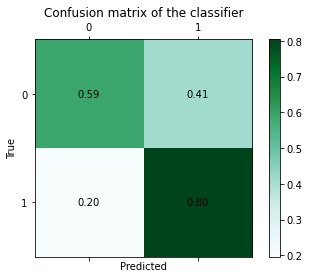

In [9]:
#confusion matrix
cm = confusion_matrix(X_test['TARGET'], prediction_t) 
print( cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
plt.set_cmap("BuGn")
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
for i in range(2):
    for j in range(2):
        c = cm[j,i]
        ax.text(i, j, str("%.2f"%c), va='center', ha='center')    
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [10]:
own_eval_metric(X_test['TARGET'], prediction_t)

max : 0.33901408450704223
treshold  0.04


('own_eval_metric', 0.33901408450704223, True)

In [11]:
#submission.to_csv('baseline_lgb.csv', index = False)

Again, we see tha some of our features made it into the most important. Going forward, we will need to think about whatother domain knowledge features may be useful for this problem (or we should consult someone who knows more about the financial industry! 

## Model Interpretation: Feature Importances

As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the `EXT_SOURCE` and the `DAYS_BIRTH`. We may use these feature importances as a method of dimensionality reduction in future work.

In [12]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

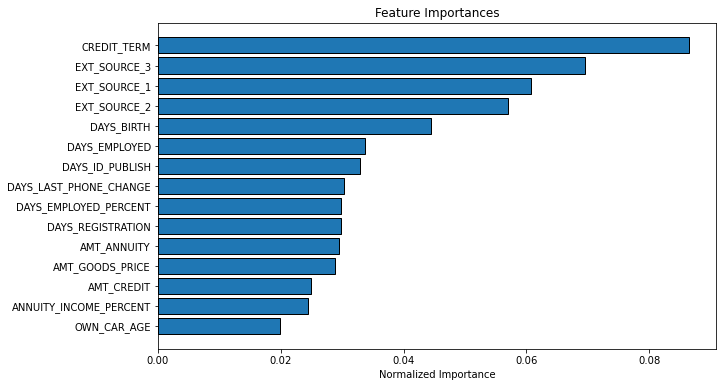

In [13]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(fi)

#LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm2(df,df_test, debug= False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df_test[df_test['TARGET'].notnull()]
   
    # LightGBMError: Do not support special JSON characters
    import re
    train_df = train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
   
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
        # Cross validation model
    folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1001)
       
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
   
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR',
                                                      'SK_ID_BUREAU','SK_ID_PREV','index']]
    model = lgb.LGBMClassifier(
        boosting_type='goss',
        n_estimators=6000,
        learning_rate=0.02,
        num_leaves=34,
        colsample_bytree=0.9497036,
        subsample=0.8715623,
        max_depth=8,
        reg_alpha=0.041545473,
        reg_lambda=0.0735294,
        min_split_gain=0.0222415,
        min_child_weight=39.3259775,
        silent=-1,
        verbose=-1 )  
   
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
            eval_metric=own_eval_metric, #Maximize_profit_evo,
                  verbose=1,
                  early_stopping_rounds=30
                 )
       
        oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
        # Prédire sur les données test
        sub_preds += model.predict_proba(test_df[feats], num_iteration=model.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = model.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del train_x, train_y, valid_x, valid_y
       
    test_df['TARGET'] = sub_preds
    gc.collect()
    display_importances(feature_importance_df)
    return model, oof_preds, sub_preds, feature_importance_df, test_df

model,oof_preds, sub_preds, feature_importance, test_df = kfold_lightgbm2(X_train, X_test)